In [1]:
import json 
import os
from pprint import pprint
import seaborn as sns 
import matplotlib.pyplot as plt
import random

In [2]:
prefix_country_tag = "best_tag_per_country_"
suffix = ""
extension = ".json"

filelist_countries_tag = []

for dirs, subdirs, files in os.walk('../maps_wrong'):
    for file in files : 
        if(prefix_country_tag in file):
            filelist_countries_tag.append(file)

print(filelist_countries_tag)

def getDates(filename):
    result = filename.replace(prefix_country_tag, '')
    result = result.replace(suffix+extension, '')
    return(result)

def getTitles(filename):
    result = filename.replace(prefix_country_tag, '')
    result = result.replace(suffix+extension, '')
    if("global" not in result):
        result = " - ".join(result.split("_"))
    return(result)

file_list = [getDates(x) for x in filelist_countries_tag]
file_title = [getTitles(x) for x in filelist_countries_tag]

filelist_legend = [x.split('.')[0] + '_legend.json' for x in filelist_countries_tag]
print(filelist_legend)


pprint(file_list)
pprint(file_title)

    

['best_tag_per_country_1920_1950.json', 'best_tag_per_country_1950_1970.json', 'best_tag_per_country_1970_1980.json', 'best_tag_per_country_1980_1990.json', 'best_tag_per_country_1990_2000.json', 'best_tag_per_country_2000_2010.json', 'best_tag_per_country_global.json']
['best_tag_per_country_1920_1950_legend.json', 'best_tag_per_country_1950_1970_legend.json', 'best_tag_per_country_1970_1980_legend.json', 'best_tag_per_country_1980_1990_legend.json', 'best_tag_per_country_1990_2000_legend.json', 'best_tag_per_country_2000_2010_legend.json', 'best_tag_per_country_global_legend.json']
['1920_1950',
 '1950_1970',
 '1970_1980',
 '1980_1990',
 '1990_2000',
 '2000_2010',
 'global']
['1920 - 1950',
 '1950 - 1970',
 '1970 - 1980',
 '1980 - 1990',
 '1990 - 2000',
 '2000 - 2010',
 'global']


In [3]:
dataset_list = []
dataset_dict = {}
for index in range(0, len(filelist_countries_tag)):
    country_json = filelist_countries_tag[index]
    legend_json = filelist_legend[index]
    title = file_title[index]
    combo_dict = {"country_json" : country_json,
                 "legend_json" : legend_json,
                 "title" : title}
    dataset_list.append(combo_dict)

dataset_dict['data'] = dataset_list
pprint(dataset_dict)
with open("../maps_new/dataset_index.json", 'w') as fp:
    json.dump(dataset_dict, fp)

{'data': [{'country_json': 'best_tag_per_country_1920_1950.json',
           'legend_json': 'best_tag_per_country_1920_1950_legend.json',
           'title': '1920 - 1950'},
          {'country_json': 'best_tag_per_country_1950_1970.json',
           'legend_json': 'best_tag_per_country_1950_1970_legend.json',
           'title': '1950 - 1970'},
          {'country_json': 'best_tag_per_country_1970_1980.json',
           'legend_json': 'best_tag_per_country_1970_1980_legend.json',
           'title': '1970 - 1980'},
          {'country_json': 'best_tag_per_country_1980_1990.json',
           'legend_json': 'best_tag_per_country_1980_1990_legend.json',
           'title': '1980 - 1990'},
          {'country_json': 'best_tag_per_country_1990_2000.json',
           'legend_json': 'best_tag_per_country_1990_2000_legend.json',
           'title': '1990 - 2000'},
          {'country_json': 'best_tag_per_country_2000_2010.json',
           'legend_json': 'best_tag_per_country_2000_2010_legend

# Load data and get dict of occurrences

In [4]:
list_tag_new = []
dict_tag_count = {}

for filename in filelist_countries_tag:
    file_path = '../maps_wrong/' + filename
    file_result = '../maps_new/' + filename
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
        if(value not in list_tag_new):
            list_tag_new.append(value)
        temp_dict = {'country' : key,
                    'tag' : value}
        if(value not in dict_tag_count):
            dict_tag_count[value] = 1
        else:
            dict_tag_count[value] += 1
        result_list.append(temp_dict)
    result_dict['features'] = result_list
    
pprint((dict_tag_count))
print(len(list_tag_new))

{'00s': 6,
 '60s': 1,
 'acoustic': 2,
 'african': 5,
 'afrobeat': 1,
 'alternative': 10,
 'alternative rock': 18,
 'ambient': 1,
 'ballad': 1,
 'beautiful': 1,
 'big band': 4,
 'blues': 1,
 'bossa nova': 1,
 'brazilian pop music': 1,
 'breakbeat': 1,
 'caribbean': 1,
 'chanson': 2,
 'classic': 2,
 'classic rock': 2,
 'club dance': 2,
 'composer': 1,
 'cool jazz': 1,
 'country': 5,
 'dark ambient': 1,
 'disco': 6,
 'dj': 2,
 'downtempo': 1,
 'dreamy': 1,
 'ebm': 1,
 'eclectic': 1,
 'electronic': 31,
 'electronica': 2,
 'emo': 1,
 'european': 1,
 'europop': 1,
 'female vocalist': 1,
 'folk': 1,
 'french': 2,
 'fusion': 1,
 'garage rock': 1,
 'german': 2,
 'german pop': 1,
 'hard house': 4,
 'hard rock': 1,
 'hardcore': 6,
 'house': 1,
 'indie': 1,
 'indie pop': 2,
 'inspirational': 1,
 'instrumental': 1,
 'jazz': 9,
 'jazz rock': 1,
 'jump blues': 1,
 'latin': 13,
 'latin pop': 2,
 'latino': 1,
 'lounge': 3,
 'melodic': 2,
 'metal': 3,
 'mondiovision': 1,
 'new beat': 1,
 'new wave': 11,

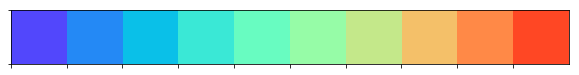

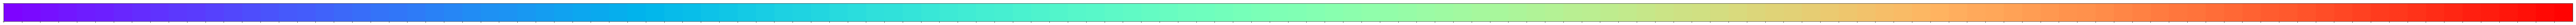

retry color
retry color
retry color
retry color


In [7]:
palette_10 = sns.color_palette("rainbow", 10).as_hex()
palette_global = sns.color_palette("rainbow", 140).as_hex()

sns.palplot(palette_10)
plt.show()
sns.palplot(palette_global)
plt.show()

list_dict_tag = []
list_color_legend = []
list_dict_tag_rest = []

i = 0
for key, value in dict_tag_count.items():
    list_dict_tag.append({'tag' : key,
                         'count' : value 
                          })
    if(value >= 7):
        list_color_legend.append({'tag': key,
                                 'color': palette_10[i]})
        i += 1
    else:
        list_dict_tag_rest.append({'tag' : key,
                     'count' : value 
                      })


# pprint(list_color_legend)
# sorted_list_dict_tag = sorted(list_dict_tag, key=lambda k: k['count'], reverse = True) 
# print(len(sorted_list_dict_tag))
# pprint(sorted_list_dict_tag)
# pprint(list_dict_tag_rest)

random.shuffle(palette_global)

for tag_data in list_dict_tag_rest:
    tag = tag_data['tag']
    potential_color = palette_global.pop()
    while(potential_color in palette_10):
        print("retry color")
        potential_color = palette_global.pop()
    list_color_legend.append({'tag' : tag, 
                             'color' : potential_color})
# pprint(list_color_legend)



# Create lookup table color 


In [8]:
color_lookup_table = {}
for tag_data in list_color_legend:
    color_lookup_table[tag_data['tag']] = tag_data['color']
# color_lookup_table    

# Create legend files

In [9]:
list_tag_diff = []

for filename in filelist_countries_tag:
    file_path = '../maps_wrong/' + filename
    filename_legend = filename.split('.')[0] + '_legend.json' 
    file_result = '../maps/' + filename_legend
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
        if(value not in list_tag_diff):
            list_tag_diff.append(value)
    legend_data = []
    for tag in list_tag_diff:
        tag_data = {'tag' : tag,
                   'color': color_lookup_table[tag]}
        legend_data.append(tag_data)
    with open(file_result, 'w') as fp:
        json.dump({"features" : legend_data}, fp)
    pprint(legend_data)

[{'color': '#07bbea', 'tag': 'blues'},
 {'color': '#0dc2e8', 'tag': 'country'},
 {'color': '#e0d377', 'tag': 'chanson'},
 {'color': '#76ffb9', 'tag': 'swing'}]
[{'color': '#07bbea', 'tag': 'blues'},
 {'color': '#0dc2e8', 'tag': 'country'},
 {'color': '#e0d377', 'tag': 'chanson'},
 {'color': '#76ffb9', 'tag': 'swing'},
 {'color': '#5247fc', 'tag': 'jazz'},
 {'color': '#2489f5', 'tag': 'rock'},
 {'color': '#0ac0e8', 'tag': 'pop'},
 {'color': '#3ae8d6', 'tag': 'soul'},
 {'color': '#dcd67a', 'tag': 'folk'},
 {'color': '#68fcc1', 'tag': 'latin'},
 {'color': '#ffa256', 'tag': 'jump blues'},
 {'color': '#ff1c0e', 'tag': 'oldies'},
 {'color': '#ff5c2f', 'tag': 'beautiful'},
 {'color': '#1898f2', 'tag': 'big band'},
 {'color': '#96fca7', 'tag': 'alternative rock'},
 {'color': '#58f8c9', 'tag': 'classic rock'},
 {'color': '#ff6232', 'tag': 'standard'},
 {'color': '#08bee9', 'tag': 'disco'},
 {'color': '#5c38fd', 'tag': 'psychedelic rock'}]
[{'color': '#07bbea', 'tag': 'blues'},
 {'color': '#0dc2

# Create map_data files 


In [10]:
for filename in filelist_countries_tag:
    file_path = '../maps_wrong/' + filename
    file_result = '../maps/' + filename
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
#         print(key, value)
        temp_dict = {'country' : key,
                    'color' : color_lookup_table[value]}
        result_list.append(temp_dict)
    result_dict['features'] = result_list
    with open(file_result, 'w') as fp:
        json.dump(result_dict, fp)

# Create dict between data and colors 

In [11]:
prefix_country = "color_per_country_hexed_"
prefix_legend = "color_per_tag_hexed_"
suffix = ""
extension = ".json"


filelist_countries = []
filelist_legend = []
filelist_countries_tag = []

for dirs, subdirs, files in os.walk('../maps_wrong'):
    for file in files : 
        if(prefix_country in file):
            filelist_countries.append(file)
        if(prefix_legend in file):
            filelist_legend.append(file)

print(filelist_countries)
print(filelist_legend)

def getDates(filename):
    result = filename.replace(prefix_country, '')
    result = result.replace(suffix+extension, '')
    return(result)

def getTitles(filename):
    result = filename.replace(prefix_country, '')
    result = result.replace(suffix+extension, '')
    if("global" not in result):
        result = " - ".join(result.split("_"))
    return(result)

file_list = [getDates(x) for x in filelist_countries]
file_title = [getTitles(x) for x in filelist_countries]

pprint(file_list)
pprint(file_title)

    

dataset_list = []
dataset_dict = {}
for index in range(0, len(filelist_countries)):
    country_json = filelist_countries[index]
    legend_json = filelist_legend[index]
    title = file_title[index]
    combo_dict = {"country_json" : country_json,
                 "legend_json" : legend_json,
                 "title" : title}
    dataset_list.append(combo_dict)
#     print(combo_dict)
# pprint(dataset_list)
dataset_dict['data'] = dataset_list
pprint(dataset_dict)
with open("../maps/dataset_index.json", 'w') as fp:
    json.dump(dataset_dict, fp)

['color_per_country_hexed_1920_1950.json', 'color_per_country_hexed_1950_1970.json', 'color_per_country_hexed_1970_1980.json', 'color_per_country_hexed_1980_1990.json', 'color_per_country_hexed_1990_2000.json', 'color_per_country_hexed_2000_2010.json', 'color_per_country_hexed_global.json']
['color_per_tag_hexed_1920_1950.json', 'color_per_tag_hexed_1950_1970.json', 'color_per_tag_hexed_1970_1980.json', 'color_per_tag_hexed_1980_1990.json', 'color_per_tag_hexed_1990_2000.json', 'color_per_tag_hexed_2000_2010.json', 'color_per_tag_hexed_global.json']
['1920_1950',
 '1950_1970',
 '1970_1980',
 '1980_1990',
 '1990_2000',
 '2000_2010',
 'global']
['1920 - 1950',
 '1950 - 1970',
 '1970 - 1980',
 '1980 - 1990',
 '1990 - 2000',
 '2000 - 2010',
 'global']
{'data': [{'country_json': 'color_per_country_hexed_1920_1950.json',
           'legend_json': 'color_per_tag_hexed_1920_1950.json',
           'title': '1920 - 1950'},
          {'country_json': 'color_per_country_hexed_1950_1970.json',
    

-> create dict former color -> new color 
-> apply it to country json when storing 
for tag
color_dict_trans[old_color] = color_lookup[tag]

-> apply it to country json 

In [12]:
dict_tag = {}
color_list = []
color_dict_trans = {}

for filename in filelist_legend:
    file_path = '../maps_wrong/' + filename
    file_result = '../maps/' + filename
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
#         print(key, value)
        if(key not in color_lookup_table):
            potential_color = palette_global.pop()
            while(potential_color in palette_10):
                print("retry color")
                potential_color = palette_global.pop()
            color_lookup_table[key] = potential_color
        temp_dict = {'tag' : key,
                    'color' : color_lookup_table[key]}
        color_dict_trans[value] = color_lookup_table[key]
        result_list.append(temp_dict)
    result_dict['features'] = result_list
    with open(file_result, 'w') as fp:
        json.dump(result_dict, fp)



In [13]:
for filename in filelist_countries:
    file_path = '../maps_wrong/' + filename
    file_result = '../maps/' + filename
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
#         print(key, value)
        temp_dict = {'country' : key,
                    'color' : color_dict_trans[value]}
        result_list.append(temp_dict)
    result_dict['features'] = result_list
    with open(file_result, 'w') as fp:
        json.dump(result_dict, fp)